1. Load heart disease dataset in pandas dataframe2. 
Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -
3. Convert text columns to numbers using label encoding and one hot encoding life

4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [6]:
df = pd.read_csv(r"C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\PCA\PCA\heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [12]:
x = df.iloc[:,:11]

In [17]:
x.RestingECG = label.fit_transform(x.RestingECG)

In [19]:
x.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [20]:
x.ChestPainType = label.fit_transform(x.ChestPainType)

In [21]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,1,140,289,0,1,172,N,0.0,Up
1,49,F,2,160,180,0,1,156,N,1.0,Flat
2,37,M,1,130,283,0,2,98,N,0.0,Up
3,48,F,0,138,214,0,1,108,Y,1.5,Flat
4,54,M,2,150,195,0,1,122,N,0.0,Up


In [23]:
x.Sex = x.Sex.apply(lambda x : 1 if x=='M' else 0)

In [25]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,N,0.0,Up
1,49,0,2,160,180,0,1,156,N,1.0,Flat
2,37,1,1,130,283,0,2,98,N,0.0,Up
3,48,0,0,138,214,0,1,108,Y,1.5,Flat
4,54,1,2,150,195,0,1,122,N,0.0,Up


In [26]:
x.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [27]:
x.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [30]:
x.ExerciseAngina = x.ExerciseAngina.apply(lambda x : int(1) if x == 'Y' else 0)

In [31]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,Up
1,49,0,2,160,180,0,1,156,0,1.0,Flat
2,37,1,1,130,283,0,2,98,0,0.0,Up
3,48,0,0,138,214,0,1,108,0,1.5,Flat
4,54,1,2,150,195,0,1,122,0,0.0,Up


In [33]:
x.ExerciseAngina = df.ExerciseAngina

In [34]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,N,0.0,Up
1,49,0,2,160,180,0,1,156,N,1.0,Flat
2,37,1,1,130,283,0,2,98,N,0.0,Up
3,48,0,0,138,214,0,1,108,Y,1.5,Flat
4,54,1,2,150,195,0,1,122,N,0.0,Up


In [35]:
x.ExerciseAngina = x.ExerciseAngina.apply(lambda x : 1 if x == 'Y' else 0)

In [36]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,Up
1,49,0,2,160,180,0,1,156,0,1.0,Flat
2,37,1,1,130,283,0,2,98,0,0.0,Up
3,48,0,0,138,214,0,1,108,1,1.5,Flat
4,54,1,2,150,195,0,1,122,0,0.0,Up


In [41]:
x.ST_Slope = label.fit_transform(x.ST_Slope)

In [42]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [43]:
x.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921


In [44]:
from scipy.stats import zscore

In [46]:
x_zscore = zscore(x)

In [47]:
x_zscore

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


In [52]:
x_zscore[(x_zscore<-3) & (x_zscore>3)].isna().sum()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
x = scaler.fit_transform(x)

In [59]:
y = df.HeartDisease

In [60]:
from sklearn.svm import SVC

In [61]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV

In [69]:
svc = SVC()
params = {'C': [0.01,0.03,0.05,0.09,0.2,0.4,0.6,0.8,1], 'kernel' : ['linear'],
          'degree' : [2,3,4,5], 'C' : [0.01,0.03,0.05,0.09,0.2,0.4,0.6,0.8,1], 'kernel' : ['poly'],
          'C' : [0.01,0.03,0.05,0.09,0.2,0.4,0.6,0.8,1], 'gamma' : [0.01,0.02,0.03,0.04,0.05]}

In [70]:
mod_cv = GridSearchCV(svc,params,cv=10,scoring='roc_auc')
mod_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.03, 0.05, 0.09, 0.2, 0.4, 0.6, 0.8, 1],
                         'degree': [2, 3, 4, 5],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ['poly']},
             scoring='roc_auc')

In [71]:
mod_cv.best_score_

0.9110484870223032

In [72]:
mod_cv.best_params_

{'C': 1, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}

In [73]:
svc  = SVC(C=1, degree=3, kernel= 'poly', gamma=0.04)
mod_sv = svc.fit(x_train,y_train)

In [74]:
y_pred = mod_sv.predict(x_test)

In [75]:
from sklearn import metrics

In [80]:
metrics.roc_auc_score(y_test,y_pred)

0.8379657725452118

In [81]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lg = LogisticRegression()

In [84]:
mod_lg = lg.fit(x_train,y_train)

In [85]:
y_pred = mod_lg.predict(x_test)

In [86]:
metrics.roc_auc_score(y_test,lg.predict_proba(x_test)[:,1])

0.9008374802767326

In [87]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [88]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
depth = int(np.log2(len(x_train[0])))
depth

3

In [96]:
rand = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3,max_features=3)

In [97]:
mod_Rf = rand.fit(x_train,y_train)

In [98]:
y_pred = mod_Rf.predict(x_test)

In [99]:
metrics.roc_auc_score(y_test,y_pred)

0.8649714771210099

In [102]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [103]:
# Logistic Regression is giving the best accuracy

In [104]:
from sklearn.decomposition import PCA

In [107]:
pca = PCA(n_components=0.95)

In [123]:
mod_pc = pca.fit_transform(x)

In [125]:
mod_pc.shape

(918, 10)

In [127]:
pca.n_components_

10

In [128]:
pca.explained_variance_

array([2.76837877, 1.46557436, 1.15768153, 1.00087542, 0.8717934 ,
       0.84739578, 0.8075159 , 0.62498964, 0.5579368 , 0.50183805])

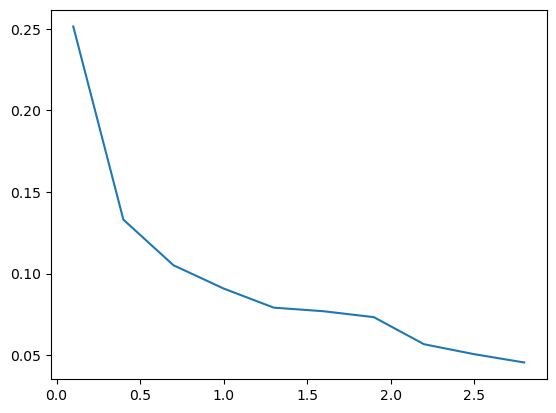

In [129]:
plt.plot(np.arange(0.1, 3, 0.3), pca.explained_variance_ratio_)

In [130]:
pca.explained_variance_ratio_

array([0.25139665, 0.1330889 , 0.10512913, 0.09088956, 0.07916761,
       0.07695206, 0.07333057, 0.05675535, 0.05066628, 0.04557194])

In [126]:
mod_pc

array([[-2.26118071, -0.16979721, -0.45156888, ...,  0.04234791,
         0.0284071 ,  0.25471323],
       [-1.13762124, -1.09754438,  1.41604703, ...,  1.51671495,
        -0.36342801,  0.72058687],
       [-1.10184573,  1.16705736, -0.85829296, ..., -0.81628144,
        -0.88738724,  1.15570514],
       ...,
       [ 1.66397172,  0.0938083 , -0.88577838, ...,  0.39188872,
        -0.08432176, -0.31823217],
       [-1.70161486, -1.42625447,  0.63769491, ...,  0.68625394,
         0.1122732 ,  0.22472526],
       [-2.49771044,  0.47481498, -0.10889369, ...,  0.74066186,
        -0.29697818, -0.04422229]])

In [131]:
x_train,x_test,y_train,y_test = train_test_split(mod_pc,y,test_size=0.2,random_state=42)

In [132]:
fin_mod = LogisticRegression()

In [133]:
fin_mod.fit(x_train,y_train)

LogisticRegression()

In [135]:
fin_mod.score(x_test,y_test)

0.842391304347826

In [137]:
#SVM
mod_sv.score(x_test,y_test)

0.8369565217391305

In [140]:
#LOG REG
mod_lg.score(x_test,y_test)

0.8478260869565217

In [141]:
#Random Forest
mod_Rf.score(x_test,y_test)

0.8641304347826086